Merging and Cleaning Streaming History Data for Streaming History prediction

In [73]:
import pycaret
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
data=pd.read_csv(r'.\time_history.csv')
df=pd.DataFrame(data)
df['datePlayed']=pd.to_datetime(df['datePlayed'])
print(df.columns)
print(df.dtypes)

Index(['datePlayed', 'secondsPlayed'], dtype='object')
datePlayed       datetime64[ns]
secondsPlayed           float64
dtype: object


In [ ]:
from pycaret.regression import *
reg1=setup(data=data,target='secondsPlayed')

In [ ]:
best = compare_models()

In [ ]:
en=create_model('en')

In [ ]:
tuned_en=tune_model(en,n_iter=50)
tuned_en=tune_model(en,optimize="MAE")

In [ ]:
bagged_en = ensemble_model(en, method = 'Bagging')
# train a adaboost classifier on dt with 100 estimators
boosted_en = ensemble_model(en, method = 'Boosting', n_estimators = 100)

In [ ]:
plot_model(en,plot='learning')

In [ ]:
evaluate_model(en)

In [ ]:
lr_pred_holdout = predict_model(en)

In [63]:
reg_data={'datePlayed':['02-01-2021','05-05-2022','09-02-2023']}
print(type(reg_data))
new_data=pd.DataFrame(reg_data)
print(new_data.dtypes)
new_data['datePlayed']=pd.to_datetime(new_data['datePlayed'])
print(new_data.dtypes)

<class 'dict'>
datePlayed    object
dtype: object
datePlayed    datetime64[ns]
dtype: object


  datePlayed        Label
0 2021-02-01  4552.362305
1 2022-05-05  4860.939453
2 2023-09-02  4907.244141
Index(['datePlayed', 'Label'], dtype='object')


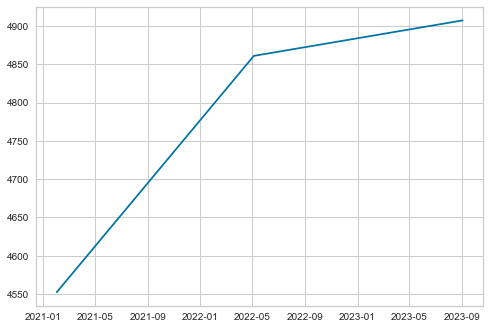

In [64]:
lr_pred_new = predict_model(en, data = new_data)
print(lr_pred_new)
print(lr_pred_new.columns)
plt.plot(new_data,lr_pred_new['Label'])
plt.show()


In [76]:
print(df.dtypes)
x=df.to_numpy()
y=df.to_numpy()
print(type(x),type(y))
reg=LinearRegression().fit(x,y)
reg.score()

datePlayed       datetime64[ns]
secondsPlayed           float64
dtype: object
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


TypeError: float() argument must be a string or a number, not 'Timestamp'